In [1]:
#Importing the Wine Dataset

import pandas as pd

url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data'
column_names = ['Class', 'Alcohol', 'Malic Acid', 'Ash', 'Alcalinity of Ash', 'Magnesium',
                'Total Phenols', 'Flavanoids', 'Nonflavanoid Phenols', 'Proanthocyanins',
                'Color Intensity', 'Hue', 'OD280/OD315 of Diluted Wines', 'Proline']

wine_data = pd.read_csv(url, names=column_names)

In [2]:
wine_data.head()

,Class,Alcohol,Malic Acid,Ash,Alcalinity of Ash,Magnesium,Total Phenols,Flavanoids,Nonflavanoid Phenols,Proanthocyanins,Color Intensity,Hue,OD280/OD315 of Diluted Wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [3]:
wine_data.describe()

,Class,Alcohol,Malic Acid,Ash,Alcalinity of Ash,Magnesium,Total Phenols,Flavanoids,Nonflavanoid Phenols,Proanthocyanins,Color Intensity,Hue,OD280/OD315 of Diluted Wines,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [4]:
wine_data['Class'].unique()

array([1, 2, 3])

In [5]:
#Dividing the dataset into Features and Target

x = wine_data.drop('Class', axis=1) 
y = wine_data['Class'] 

In [6]:
#Since PCA requires the data to be standardized,

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(x)

In [7]:
from sklearn.decomposition import PCA

pca = PCA()
X_pca = pca.fit_transform(X_scaled)


In [8]:
#To determine optimal components

import numpy as np

e_var = pca.explained_variance_ratio_
c_var = np.cumsum(e_var)

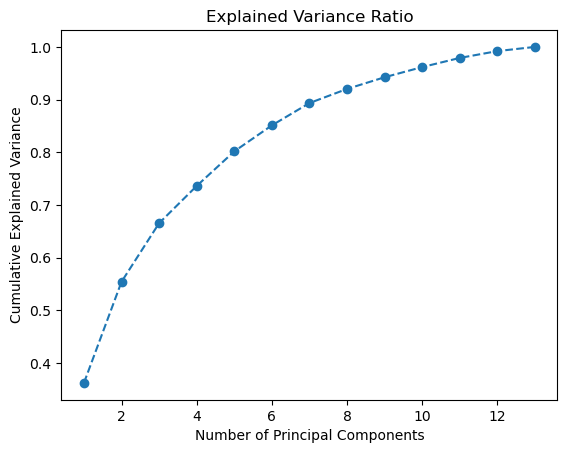

In [9]:
import matplotlib.pyplot as plt

plt.plot(range(1, len(e_var) + 1), c_var, marker='o', linestyle='--')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance Ratio')
plt.show()

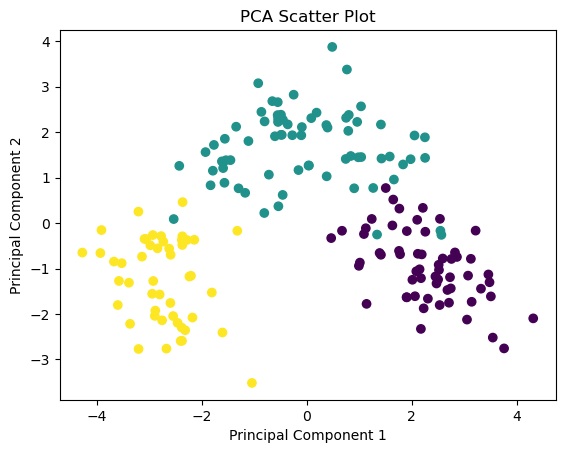

In [10]:
#Scatter plot form first 2 principal components
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Scatter Plot')
plt.show()


In the scatter plot visualization of PCA, we are representing the data points in a lower-dimensional space, specifically in this case, using the first three principal components.

The principal components are new variables that are obtained through a linear transformation of the original features. Each principal component is a linear combination of the original features, and they are ordered in such a way that the first principal component captures the maximum variance in the data, the second principal component captures the next highest variance orthogonal to the first component, and so on.

By plotting the data points using the principal components as coordinates, we can visualize how the instances are distributed in this reduced-dimensional space. Each point in the scatter plot represents an instance, and the color of the point represents its class label.

In [11]:
#Performing K-Means on modified data
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3)  
kmeans.fit(X_pca[:, :2])  # Using only the first two principal components
cluster_labels = kmeans.labels_


/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


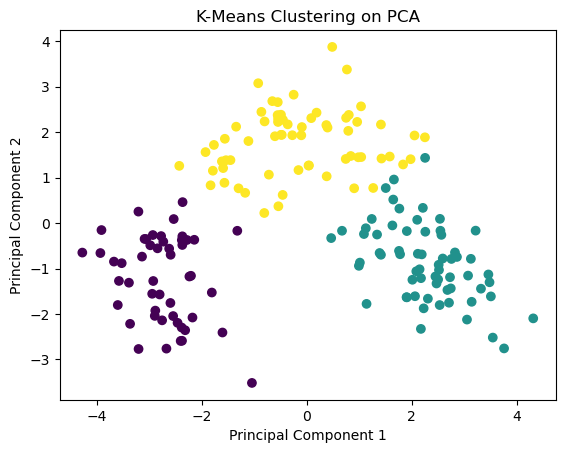

In [12]:
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=cluster_labels, cmap='viridis')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('K-Means Clustering on PCA')
plt.show()


K-Means Clustering and PCA divide the data pretty evenly when we consider the scaled PCA data

In [13]:
#Now we analyze our models

from sklearn.model_selection import train_test_split

In [14]:
#Let us first consider taking first 2 principal components
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_pca[:, :2], y, test_size=0.2, random_state=42)

In [15]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
model.fit(X_train, y_train)

RandomForestClassifier()

In [16]:
y_pred = model.predict(X_test)

In [17]:
from sklearn.metrics import accuracy_score, classification_report

accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Classification Report:")
print(report)

Accuracy: 1.0
Classification Report:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        14
           2       1.00      1.00      1.00        14
           3       1.00      1.00      1.00         8

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36



So we see that first two components were good enough for accurate results and we didnt need more higher dimensional data